<a href="https://colab.research.google.com/github/Piyati/Design-Obser/blob/main/Lab_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Training Deep Recurrent Neural Network


## Lab Instruction - Emojify

In this lab, you will learn to train a deep Recurrent neural network using Keras library with Tensorflow backend. Your task is to do the sentimental analysis which you will predict the emoji that represent the emotion in each sentence.


In [1]:
# Import require library
from keras import *
from keras.preprocessing import text
from keras.preprocessing import sequence

In [2]:
from sklearn.model_selection import train_test_split

import _utils as fn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data

In [3]:
# import data
df = pd.read_csv('/content/drive/MyDrive/ML_RNN/emoji_data.csv')
df.describe()

,emoji
count,7480.000000
mean,2.977273
std,1.999269
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


In [4]:
df.head()

,sentence,emoji
0,"During the period of falling in love, each tim...",0
1,When I was involved in a traffic accident.,1
2,When I was driving home after several days of...,2
3,When I lost the person who meant the most to me.,3
4,The time I knocked a deer down - the sight of ...,4


In [5]:
x = df['sentence'].values
y = df['emoji'].values

In [6]:
x[0]

'During the period of falling in love, each time that we met and especially when we had not met for a long time.'

In [7]:
y[0]

0

### Split train test

In [8]:
# Split train test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.1,stratify=y,random_state=0)
# Split train validate
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size =0.1,stratify=y,random_state=0)

Text(0.5, 1.0, 'y val')

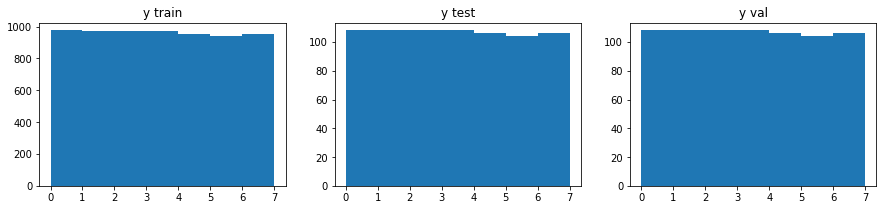

In [9]:
# Plot target distribution
fig,ax =plt.subplots(1,3,figsize=(15,3))

bins = [0,1,2,3,4,5,6,7]

ax[0].hist(y_train,bins=bins)
ax[0].set_title('y train')
ax[1].hist(y_test,bins=bins)
ax[1].set_title('y test')
ax[2].hist(y_val,bins=bins)
ax[2].set_title('y val')

### Preprocess data: Tokenizer & Padding

In [10]:
# Define parameter
max_word = 5000
maxlen = 20
max_features = 5000

In [11]:
# Define Tokenizer
tokenizer = text.Tokenizer(num_words = max_word) #define corpus  to keep maximum number of words 
tokenizer.fit_on_texts(x_train)

In [12]:
tokenizer.word_index

{'i': 1,
 'the': 2,
 'a': 3,
 'to': 4,
 'my': 5,
 'and': 6,
 'was': 7,
 'when': 8,
 'of': 9,
 'in': 10,
 'had': 11,
 'me': 12,
 'that': 13,
 'for': 14,
 'not': 15,
 'with': 16,
 'it': 17,
 'at': 18,
 'on': 19,
 'he': 20,
 'very': 21,
 'friend': 22,
 'felt': 23,
 'an': 24,
 'she': 25,
 'her': 26,
 'we': 27,
 'one': 28,
 'as': 29,
 'about': 30,
 'this': 31,
 'from': 32,
 'after': 33,
 'time': 34,
 'by': 35,
 'were': 36,
 'did': 37,
 'but': 38,
 'out': 39,
 'him': 40,
 'who': 41,
 'because': 42,
 'his': 43,
 'been': 44,
 'got': 45,
 'have': 46,
 'some': 47,
 'which': 48,
 'home': 49,
 'would': 50,
 'friends': 51,
 'up': 52,
 'told': 53,
 'so': 54,
 'day': 55,
 'mother': 56,
 'they': 57,
 'be': 58,
 'do': 59,
 'school': 60,
 'people': 61,
 'went': 62,
 'person': 63,
 'there': 64,
 'saw': 65,
 'our': 66,
 'first': 67,
 'is': 68,
 'could': 69,
 'came': 70,
 'night': 71,
 'father': 72,
 'go': 73,
 'all': 74,
 "didn't": 75,
 'made': 76,
 'mine': 77,
 'girl': 78,
 'having': 79,
 'back': 80,
 'o

In [13]:
tokenizer.num_words

5000

In [14]:
# Preprocess data function
def preprocess_fn(data):
    sequeces = tokenizer.texts_to_sequences(data)
    padding_sequences = sequence.pad_sequences(sequeces,maxlen = maxlen)
    
    return padding_sequences,sequeces

In [15]:
# Preprocess data
x_train,sequeces_x_train =  preprocess_fn(x_train)
x_val,sequeces_x_val = preprocess_fn(x_val)
x_test,sequeces_x_test = preprocess_fn(x_test)

In [16]:
x_train

array([[ 338,    4,  719, ...,    6, 1529,   93],
       [   0,    0,    0, ...,  408,    4,   12],
       [   4,  345,    3, ...,   11,  172,  173],
       ...,
       [   0,    0,    0, ...,  127,    5,   22],
       [   0,    0,    0, ...,   86, 1403,   12],
       [  14,   40,    4, ...,  981,    4,   12]], dtype=int32)

In [17]:
sequeces_x_train

[[188,
  9,
  3,
  1406,
  3199,
  27,
  11,
  4,
  221,
  17,
  107,
  42,
  5,
  100,
  240,
  2584,
  4,
  17,
  27,
  202,
  17,
  4,
  3,
  98,
  41,
  402,
  784,
  6,
  1528,
  9,
  81,
  784,
  14,
  338,
  4,
  719,
  27,
  62,
  4,
  345,
  66,
  3199,
  17,
  7,
  314,
  561,
  35,
  2,
  81,
  4453,
  6,
  1529,
  93],
 [1, 46, 23, 31, 161, 8, 3, 63, 164, 1, 661, 6, 720, 408, 4, 12],
 [304,
  18,
  321,
  87,
  721,
  4,
  345,
  3,
  96,
  456,
  10,
  242,
  33,
  26,
  188,
  1,
  23,
  21,
  111,
  6,
  1204,
  1,
  11,
  172,
  173],
 [1,
  688,
  4,
  5,
  56,
  19,
  2,
  507,
  25,
  11,
  1663,
  508,
  6,
  7,
  382,
  4,
  58,
  2162,
  1,
  374,
  4,
  578,
  26,
  2,
  633,
  9,
  2,
  579,
  6,
  133,
  130,
  2163,
  66,
  562,
  25,
  202,
  12,
  2,
  633,
  10,
  722],
 [8,
  4454,
  16,
  3200,
  457,
  1664,
  114,
  5,
  121,
  6,
  1882,
  12,
  4,
  221,
  88,
  152,
  103,
  383,
  188],
 [45, 220, 67, 1142, 143],
 [8,
  1,
  458,
  13,
  1,
  11,
  

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Build a model with word embedding

In [44]:
# Define model
rnn =models.Sequential()
rnn.add(layers.Embedding(max_features,32,input_length=maxlen))

rnn.add(layers.SimpleRNN(32))
rnn.add(layers.Dense(64,activation='elu'))
rnn.add(layers.Dense(7,activation='softmax'))

In [45]:
# Compile model
rnn.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [46]:
# Show model structure
rnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 32)            160000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 7)                 455       
                                                                 
Total params: 164,647
Trainable params: 164,647
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Define callbacks
rnn.save('model1_callblacks.h5')
from keras import callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3)
rnn = models.load_model('model1_callblacks.h5')
history = rnn.fit(x_train,y_train,epochs=6,
                  validation_data=(x_val,y_val),
                  callbacks=[early_stop])
rnn.save('model1_callblacks.h5')

Epoch 1/6
211/211 [==============================] - 8s 33ms/step - loss: 1.8939 - acc: 0.1906 - val_loss: 1.7943 - val_acc: 0.2848
Epoch 2/6
211/211 [==============================] - 7s 32ms/step - loss: 1.5553 - acc: 0.2032 - val_loss: 1.5398 - val_acc: 0.1364
Epoch 3/6
211/211 [==============================] - 7s 33ms/step - loss: 1.1681 - acc: 0.1613 - val_loss: 1.5194 - val_acc: 0.1444
Epoch 4/6
211/211 [==============================] - 7s 32ms/step - loss: 0.8887 - acc: 0.1491 - val_loss: 1.7567 - val_acc: 0.0829
Epoch 5/6
211/211 [==============================] - 7s 33ms/step - loss: 0.6781 - acc: 0.1493 - val_loss: 1.7577 - val_acc: 0.1404
Epoch 6/6
211/211 [==============================] - 7s 32ms/step - loss: 0.4973 - acc: 0.1465 - val_loss: 2.0866 - val_acc: 0.1096


Last train accuracy: 0.14646464586257935
Last validation accuracy: 0.1096256673336029


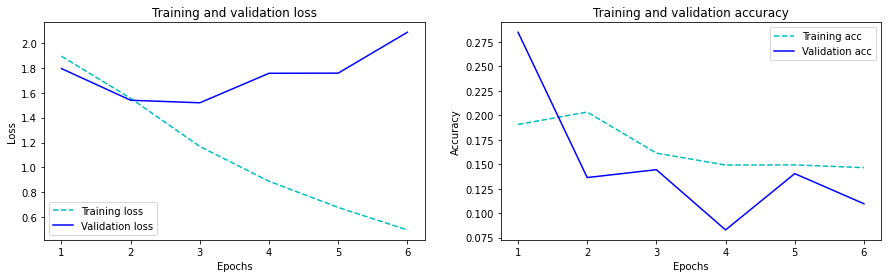

In [48]:
fn.show_result(history)

In [24]:
# Fit model
his =  rnn.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/5
211/211 [==============================] - 7s 31ms/step - loss: 0.5111 - acc: 0.1480 - val_loss: 2.0825 - val_acc: 0.1979
Epoch 2/5
211/211 [==============================] - 7s 31ms/step - loss: 0.3707 - acc: 0.1460 - val_loss: 2.2626 - val_acc: 0.1765
Epoch 3/5
211/211 [==============================] - 7s 31ms/step - loss: 0.2709 - acc: 0.1448 - val_loss: 2.6716 - val_acc: 0.1537
Epoch 4/5
211/211 [==============================] - 6s 31ms/step - loss: 0.1909 - acc: 0.1450 - val_loss: 2.7160 - val_acc: 0.1511
Epoch 5/5
211/211 [==============================] - 7s 31ms/step - loss: 0.1449 - acc: 0.1457 - val_loss: 3.0349 - val_acc: 0.1176


Last train accuracy: 0.1457219272851944
Last validation accuracy: 0.11764705926179886


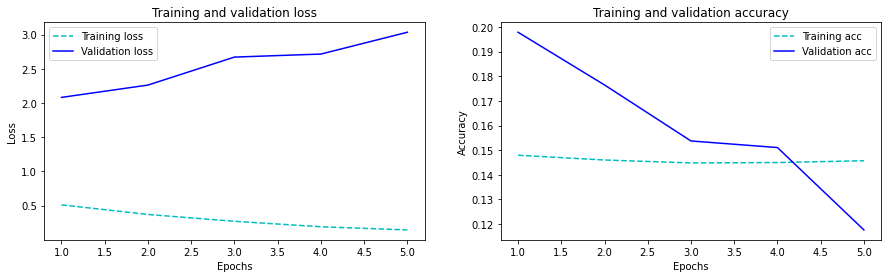

In [25]:

# Plot accuracy and loss over each epochs
fn.show_result(his)

###LSTM

In [26]:
# Define model
lstm =models.Sequential()
lstm.add(layers.Embedding(max_features,32,input_length=maxlen))

lstm.add(layers.LSTM(32))
lstm.add(layers.Dense(64,activation='elu'))
lstm.add(layers.Dense(7,activation='softmax'))

In [27]:
# Compile model
lstm.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [28]:
# Fit model
his2 =  lstm.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/5
211/211 [==============================] - 6s 12ms/step - loss: 1.8521 - acc: 0.2351 - val_loss: 1.6792 - val_acc: 0.3556
Epoch 2/5
211/211 [==============================] - 2s 9ms/step - loss: 1.4686 - acc: 0.4495 - val_loss: 1.4824 - val_acc: 0.4599
Epoch 3/5
211/211 [==============================] - 2s 10ms/step - loss: 1.1958 - acc: 0.5720 - val_loss: 1.3651 - val_acc: 0.5067
Epoch 4/5
211/211 [==============================] - 2s 9ms/step - loss: 1.0136 - acc: 0.6439 - val_loss: 1.3947 - val_acc: 0.5201
Epoch 5/5
211/211 [==============================] - 2s 8ms/step - loss: 0.8918 - acc: 0.6900 - val_loss: 1.4260 - val_acc: 0.5107


Last train accuracy: 0.6899881362915039
Last validation accuracy: 0.5106951594352722


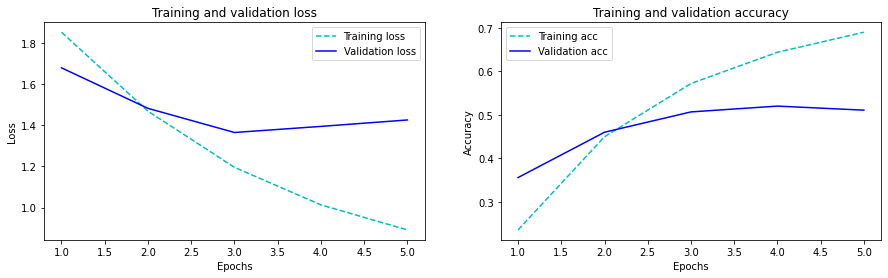

In [29]:
fn.show_result(his2)

In [299]:
# Define model
lstm =models.Sequential()
lstm.add(layers.Embedding(max_features,32,input_length=maxlen))

lstm.add(layers.LSTM(32))
lstm.add(layers.Dense(64,activation='elu'))
lstm.add(layers.Dense(7,activation='softmax'))
lstm.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

Last train accuracy: 0.7502970695495605
Last validation accuracy: 0.5414438247680664


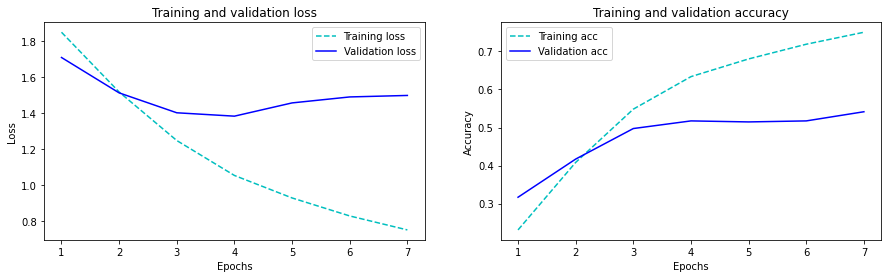

In [300]:
# Define callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3)
his4 =  lstm.fit(x_train,y_train,epochs=50,batch_size=32,callbacks=[early_stop],validation_data=(x_val,y_val), verbose=0 )
fn.show_result(his4)

In [236]:
# Define model
lstm =models.Sequential()
lstm.add(layers.Embedding(max_features,64,input_length=maxlen))

lstm.add(layers.LSTM(64))
lstm.add(layers.Dense(64,activation='elu'))
lstm.add(layers.Dense(7,activation='softmax'))
lstm.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

Epoch 1/5
211/211 [==============================] - 5s 12ms/step - loss: 1.7892 - acc: 0.2751 - val_loss: 1.5781 - val_acc: 0.3917
Epoch 2/5
211/211 [==============================] - 2s 9ms/step - loss: 1.3538 - acc: 0.4921 - val_loss: 1.4203 - val_acc: 0.4799
Epoch 3/5
211/211 [==============================] - 2s 9ms/step - loss: 1.0904 - acc: 0.6110 - val_loss: 1.3632 - val_acc: 0.5160
Epoch 4/5
211/211 [==============================] - 2s 9ms/step - loss: 0.9274 - acc: 0.6747 - val_loss: 1.4079 - val_acc: 0.5027
Epoch 5/5
211/211 [==============================] - 2s 10ms/step - loss: 0.8172 - acc: 0.7201 - val_loss: 1.4804 - val_acc: 0.5201
Last train accuracy: 0.7201426029205322
Last validation accuracy: 0.5200534462928772


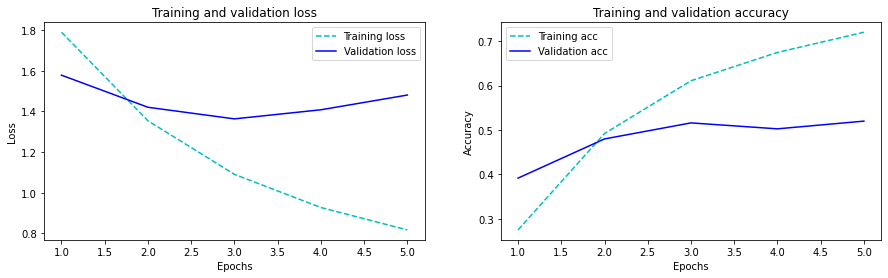

In [237]:
# Define callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3)
his5 =  lstm.fit(x_train,y_train,epochs=5,batch_size=32,callbacks=[early_stop],validation_data=(x_val,y_val))
fn.show_result(his5)

### Evaluate Model
Baseline of the model is 14.28% (Random prediction)

In [32]:
# Preprocess test data
rnn.evaluate(x_test,y_test)

24/24 [==============================] - 0s 5ms/step - loss: 3.0349 - acc: 0.1176


[3.0349481105804443, 0.11764705926179886]

In [33]:
# Evaluate model with test data

In [34]:
# Show confusino matrix and prediction report
fn.evaluation_report(rnn,x_test,y_test)

[[53  5  4 23  9  8  6]
 [ 5 56 17 11  7  7  5]
 [ 8 14 37 16  3 14 16]
 [ 2 14 19 55  2  8  8]
 [ 7 16 13 10 40 11  9]
 [ 9 17 15 12  6 25 20]
 [ 4  5 23 12  4 18 40]]
              precision    recall  f1-score   support

           0       0.60      0.49      0.54       108
           1       0.44      0.52      0.48       108
           2       0.29      0.34      0.31       108
           3       0.40      0.51      0.45       108
           4       0.56      0.38      0.45       106
           5       0.27      0.24      0.26       104
           6       0.38      0.38      0.38       106

    accuracy                           0.41       748
   macro avg       0.42      0.41      0.41       748
weighted avg       0.42      0.41      0.41       748

Loss: 3.0349481105804443 Accuracy: 0.11764705926179886


array([1, 6, 3, 2, 1, 3, 5, 2, 2, 5, 2, 3, 1, 1, 5, 1, 0, 1, 3, 6, 4, 0,
       2, 6, 2, 4, 3, 1, 6, 2, 3, 6, 5, 4, 6, 3, 6, 6, 6, 2, 0, 1, 5, 2,
       4, 6, 3, 3, 2, 3, 3, 3, 1, 5, 1, 5, 3, 1, 3, 5, 5, 1, 0, 0, 3, 6,
       1, 6, 4, 3, 1, 5, 1, 0, 0, 4, 2, 3, 6, 2, 6, 5, 3, 6, 5, 6, 6, 2,
       3, 6, 1, 1, 5, 6, 4, 1, 4, 3, 5, 6, 2, 1, 5, 1, 1, 1, 0, 0, 3, 3,
       5, 0, 3, 6, 0, 1, 6, 6, 3, 6, 1, 6, 3, 4, 0, 4, 4, 0, 5, 2, 6, 6,
       2, 6, 1, 3, 1, 2, 3, 2, 0, 0, 2, 3, 2, 3, 5, 5, 3, 1, 2, 1, 1, 1,
       0, 1, 0, 2, 1, 4, 5, 5, 2, 0, 3, 3, 5, 6, 2, 3, 6, 0, 0, 0, 3, 2,
       4, 1, 1, 1, 6, 3, 5, 6, 3, 5, 0, 6, 0, 3, 4, 1, 3, 3, 0, 2, 0, 0,
       3, 1, 6, 4, 3, 1, 5, 2, 0, 2, 1, 1, 0, 1, 4, 3, 2, 3, 3, 4, 2, 6,
       5, 0, 5, 1, 2, 2, 1, 5, 2, 0, 3, 3, 5, 3, 1, 5, 2, 6, 3, 4, 6, 1,
       4, 4, 0, 3, 0, 2, 2, 5, 3, 4, 1, 2, 3, 3, 2, 4, 3, 5, 4, 0, 3, 5,
       2, 4, 2, 1, 3, 6, 4, 4, 0, 5, 2, 6, 1, 1, 2, 3, 2, 0, 1, 1, 5, 6,
       1, 6, 5, 2, 2, 3, 0, 6, 0, 1, 1, 6, 1, 1, 6,

In [35]:
rnn.save('model1.h5')

In [36]:
# Preprocess test data
lstm.evaluate(x_test,y_test)

24/24 [==============================] - 0s 4ms/step - loss: 1.7443 - acc: 0.5254


[1.7443188428878784, 0.5254010558128357]

In [37]:
# Show confusino matrix and prediction report
fn.evaluation_report(lstm,x_test,y_test)

[[78  3  6  6 11  4  0]
 [ 2 69  6  9 13  1  8]
 [ 7  6 48  9 22  7  9]
 [ 6  5 18 57 10  7  5]
 [ 9  3 14  4 65  4  7]
 [ 8 11 22  5 10 32 16]
 [ 3  3 29  9  8 10 44]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.71       108
           1       0.69      0.64      0.66       108
           2       0.34      0.44      0.38       108
           3       0.58      0.53      0.55       108
           4       0.47      0.61      0.53       106
           5       0.49      0.31      0.38       104
           6       0.49      0.42      0.45       106

    accuracy                           0.53       748
   macro avg       0.54      0.52      0.52       748
weighted avg       0.54      0.53      0.52       748

Loss: 1.7443188428878784 Accuracy: 0.5254010558128357


array([1, 6, 3, 4, 6, 3, 0, 0, 1, 1, 4, 3, 3, 4, 1, 1, 4, 2, 4, 6, 4, 0,
       4, 6, 3, 4, 3, 1, 5, 2, 3, 2, 6, 4, 3, 0, 6, 2, 2, 0, 0, 4, 0, 6,
       4, 2, 3, 3, 1, 3, 3, 0, 1, 0, 4, 5, 3, 1, 0, 6, 0, 4, 0, 0, 0, 6,
       2, 2, 0, 0, 4, 4, 1, 0, 0, 4, 2, 3, 6, 2, 2, 2, 2, 0, 5, 6, 5, 4,
       2, 2, 5, 1, 5, 2, 0, 0, 0, 3, 5, 6, 2, 4, 4, 3, 5, 1, 4, 0, 0, 3,
       6, 1, 0, 6, 0, 1, 1, 2, 3, 2, 1, 5, 6, 0, 4, 4, 0, 4, 2, 4, 2, 5,
       3, 2, 1, 0, 4, 6, 4, 4, 0, 0, 6, 3, 6, 2, 5, 5, 3, 1, 1, 1, 2, 1,
       0, 4, 0, 4, 4, 4, 6, 6, 4, 0, 3, 3, 4, 6, 2, 3, 1, 0, 4, 0, 0, 2,
       4, 2, 1, 4, 2, 1, 4, 5, 0, 1, 0, 6, 6, 3, 0, 1, 3, 3, 0, 6, 2, 4,
       4, 2, 6, 4, 6, 4, 5, 2, 5, 2, 1, 1, 0, 2, 3, 0, 6, 3, 0, 2, 2, 6,
       0, 2, 4, 1, 2, 2, 4, 0, 3, 4, 2, 0, 5, 0, 1, 2, 6, 5, 2, 1, 6, 5,
       0, 4, 2, 2, 0, 1, 2, 2, 5, 4, 2, 2, 3, 6, 4, 4, 3, 2, 4, 0, 3, 2,
       6, 4, 6, 5, 6, 6, 4, 0, 2, 6, 6, 6, 1, 6, 3, 3, 2, 0, 1, 1, 5, 4,
       2, 2, 6, 0, 2, 4, 4, 5, 0, 5, 2, 2, 4, 1, 6,

In [38]:
lstm.save('model2.h5')

# ### Play with your model
**Emoji**
0 = joy 😆
1 = fear 😱
2 = anger 😡
3 = sadness 😭
4 = disgust 🤮
5 = shame 😳
6 = guilt 😞

In [39]:
# Define predict function
def predict_emoji(input_text,model):
    
    prepro_input = preprocess_fn([input_text])
    prepro_input = prepro_input[0]
    pred_class = model.predict(prepro_input).argmax(axis =1)
    
    label_to_emoji = ['😆','😱','😡','😭','🤮','😳','😞']
    
    result = label_to_emoji[int(pred_class)]
    
    print('%s %s'%(input_text,result))

In [40]:
# Test your model
input_text ='I like this class'
predict_emoji(input_text,rnn)

I like this class 😱


In [41]:
# Test your model
input_text = 'I like this class'
predict_emoji(input_text,lstm)

I like this class 🤮


In [42]:
input_text = 'I love this class'
predict_emoji(input_text,rnn)

I love this class 😱
